In [1]:
"""
The purpose of this notebook is to compute efficiencies and look at reconstruction level variables of privately produced resonant ultra-legacy samples in order to:
- Determine how many events to request 
- Understand if we need to change our analysis strategy, e.g. the number of good jets required as a fullyhadronic preselection
"""

'\nThe purpose of this notebook is to compute efficiencies and look at reconstruction level variables of privately produced resonant ultra-legacy samples in order to:\n- Determine how many events to request \n- Understand if we need to change our analysis strategy, e.g. the number of good jets required as a fullyhadronic preselection\n'

In [2]:
%matplotlib inline

In [2]:
import uproot 
import os 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
# d = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0/"
d = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0/"

In [4]:
files = [] 
for f in os.listdir(d):
    files.append("%s/%s"%(d, f))

In [5]:
files.sort(key = lambda x: float(x.split('_')[-3][1:]))
print ("result", files)

result ['/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0//output_X250_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root', '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0//output_X1000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root', '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0//output_X3000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root']


In [6]:
N_microAOD_events = {
    "250_FH" : 9885,
    "1000_FH" : 9901, 
    "3000_FH" : 9895,
    "250_SL" : 9995,
    "1000_SL" : 9994,
    "3000_SL" : 9993
}

FH_tree_names = {
    "250_FH" : "X250_GluGluToRadionToHHTo2G2WTo2G4Q_13TeV",
    "1000_FH" : "X1000_FH_13TeV",
    "3000_FH" : "X3000_FH_13TeV",
    "250_SL" : "X250_SL_13TeV",
    "1000_SL" :"X1000_SL_13TeV",
    "3000_SL" : "X3000_SL_13TeV"   
}

tags = [i for i in range(0,4)]

In [7]:
def bimod_unc(a, b):
    ratio = a / b
    uncertainty = ratio * np.sqrt((1/a) + (1/b))
    return uncertainty

In [11]:
masses = []
dipho_presel_effs = []
FH_presel_effs = []
SL_presel_effs = [] 

dipho_presel_effs_errors = []
FH_presel_effs_errors = []
SL_presel_effs_errors = [] 

for f in files:
    print(f)
    ##-- total number of entries (tags combined)
    mass = f.split('_')[-3]
    mass = mass.replace("X", "")
    masses.append(float(mass))
    print("mass:",mass)
    if("GluGluToRadionToHHTo2G2WTo2G4Q" in f):
        finalState = "FH"
    elif("2G2WTo2G2Q1L1Nu"):
        finalState = "SL"
    mass_finalState = "%s_%s"%(mass, finalState)
    u_f = uproot.open(f)
    tree_name = FH_tree_names[mass_finalState]
    
    total_entries = 0 
    entries_microAOD = N_microAOD_events[mass_finalState]
    for tag_i in tags:
#         print("Tag:",tag_i)
        fullTreeName = "%s_HHWWggTag_%s"%(tree_name, tag_i)
        CMS_hgg_mass = u_f['tagsDumper/trees'][fullTreeName]['CMS_hgg_mass'].array()
        N_entries = len(CMS_hgg_mass)
        exec("N_entries_tag_%s = N_entries"%(tag_i))
        total_entries += N_entries 
#     print("total entries:",total_entries)
#     print("over microAOD entries:",total_entries / entries_microAOD)
#     print("After FH preselections:",N_entries_tag_1 / entries_microAOD)
#     print("After SL preselections:",N_entries_tag_0 / entries_microAOD)
    
    dipho_presel_effs.append(total_entries / entries_microAOD)
    FH_presel_effs.append(N_entries_tag_1 / entries_microAOD)
    SL_presel_effs.append(N_entries_tag_0 / entries_microAOD)
    
    dipho_presel_effs_errors.append( bimod_unc(total_entries, entries_microAOD))
    FH_presel_effs_errors.append(bimod_unc(N_entries_tag_1, entries_microAOD))
    SL_presel_effs_errors.append(bimod_unc(N_entries_tag_0, entries_microAOD))
    
print("dipho_presel_effs:",dipho_presel_effs)
print("FH_presel_effs:",FH_presel_effs)
print("SL_presel_effs:",SL_presel_effs)
    
print("dipho_presel_effs_errors:",dipho_presel_effs_errors)
print("FH_presel_effs_errors",FH_presel_effs_errors)
print("SL_presel_effs_errors",SL_presel_effs_errors)
    
print("DONE") 

/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0//output_X250_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root
mass: 250
/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0//output_X1000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root
mass: 1000
/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0//output_X3000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root
mass: 3000
dipho_presel_effs: [0.5086543271635818, 0.6332799679807884, 0.709996997898529]
FH_presel_effs: [0.03221610805402701, 0.14078447068240946, 0.17292104473131192]
SL_presel_effs: [0.18319159579789895, 0.13778266960176105, 0.02531772240568398]
dipho_presel_effs_errors: [0.008762233935609855, 0.01017322196994657, 0.011022446167525905]
FH_presel_effs_errors [0.0018240236013458567, 0.004008754900999479, 0.004505161570995492]
SL_presel_effs_errors [0.0046568142131929715, 0.003960566249344174, 0.0016117348820077

In [9]:
logs = [0, 1]

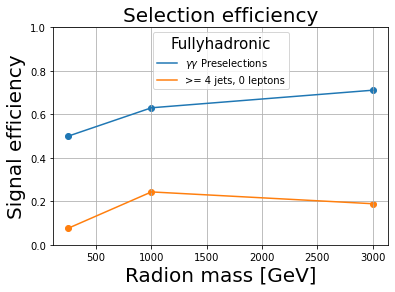

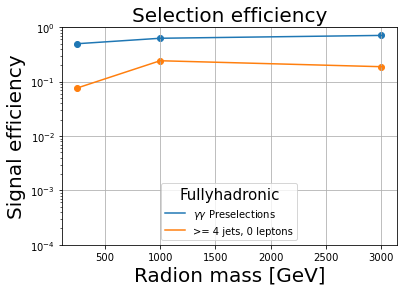

In [103]:
for log in logs:
    fig, ax = plt.subplots()
    plt.scatter(x = masses, y = dipho_presel_effs)
    plt.plot(masses, dipho_presel_effs, label = r'$\gamma\gamma$ Preselections')

    plt.scatter(x = masses, y = FH_presel_effs)
    plt.plot(masses, FH_presel_effs, label = ">= 4 jets, 0 leptons")

    
    plt.title("Selection efficiency", fontsize = 20)
    plt.xlabel("Radion mass [GeV]", fontsize = 20)
    plt.ylabel("Signal efficiency", fontsize = 20)
    plt.grid()

    if(log):
        plt.yscale("log")
        plt.ylim(0.0001, 1)
        legend = plt.legend(loc = 'lower center', title = "Fullyhadronic")
    else:
        plt.ylim(0, 1)
        legend = plt.legend(loc = 'upper center', title = "Fullyhadronic")
       
        
    plt.setp(legend.get_title(),fontsize=15)

    plt.show()
    plt.close()

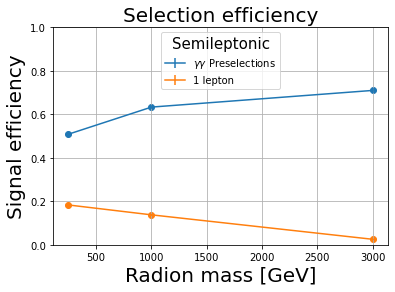

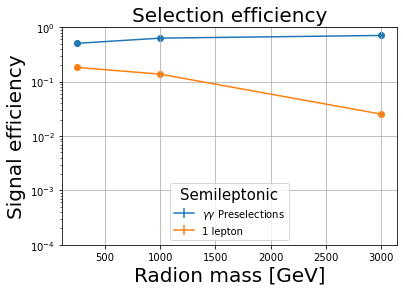

In [10]:
for log in logs:
    fig, ax = plt.subplots()
    plt.scatter(x = masses, y = dipho_presel_effs)
    plt.errorbar(masses, dipho_presel_effs, yerr = dipho_presel_effs_errors, label = r'$\gamma\gamma$ Preselections')
#     plt.error(masses, dipho_presel_effs, label = r'$\gamma\gamma$ Preselections')

    plt.scatter(x = masses, y = SL_presel_effs)
    plt.errorbar(masses, SL_presel_effs, yerr = SL_presel_effs_errors, label = "1 lepton")

    plt.title("Selection efficiency", fontsize = 20)
    plt.xlabel("Radion mass [GeV]", fontsize = 20)
    plt.ylabel("Signal efficiency", fontsize = 20)
    plt.grid()

    if(log):
        plt.yscale("log")
        plt.ylim(0.0001, 1)
        legend = plt.legend(loc = 'lower center', title = "Semileptonic")
    else:
        plt.ylim(0, 1)
        legend = plt.legend(loc = 'upper center', title = "Semileptonic")
        
    plt.setp(legend.get_title(),fontsize=15)

    plt.show()
    plt.close()

In [30]:
fs = "FH"

if(fs == "SL"):
    d = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/semileptonic_Spin_0/"
    files = [
        "%s/output_X250_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root"%(d),
        "%s/output_X1000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root"%(d),
        "%s/output_X3000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root"%(d)        
    ]
elif(fs == "FH"):
    d = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0/"
    files = [
        "%s/output_X250_GluGluToRadionToHHTo2G2WTo2G4Q_0.root"%(d),
        "%s/output_X1000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root"%(d),
        "%s/output_X3000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root"%(d)          
    ]

tree_names = {
    "output_X250_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root" : "X250_SL_13TeV",
    "output_X1000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root" : "X1000_SL_13TeV",
    "output_X3000_GluGluToRadionToHHTo2G2WTo2G2Q1L1Nu_0.root" : "X3000_SL_13TeV",
    "output_X250_GluGluToRadionToHHTo2G2WTo2G4Q_0.root" : "X250_GluGluToRadionToHHTo2G2WTo2G4Q_13TeV",
    "output_X1000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root" : "X1000_FH_13TeV",
    "output_X3000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root" : "X3000_FH_13TeV",    
}

In [31]:
# def Add_CMS_Header(plt, lumi, isWide, ax):
def Add_CMS_Header(plt, isWide, ax):
    ##-- Upper left plot text
    ##-- CMS 
    plt.text(
        # 0.05, 0.9, u"CMS $\it{Preliminary}$",
        0., 1., u"CMS ",
        fontsize=20, fontweight='bold',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )

    
    if(isWide):
        prelim_x = 0.08
    else:
        prelim_x = 0.08
#         prelim_x = 0.12
        
    
    ##-- Preliminary 
    plt.text(
#         prelim_x, 0.998, u"$\it{Preliminary}$",
#         prelim_x, 0.998, u"$\it{Simulation   Preliminary}$",
#         prelim_x, 0.998, u"$\it{Simulation}$",
        prelim_x, 0.998, u"$\it{Simulation}$ $\it{Preliminary}$",
#         prelim_x + 0.05, 0.998, u"$\it{Preliminary}$",
        fontsize=18,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )    
    
#     ##-- Preliminary 
#     plt.text(
# #         prelim_x, 0.998, u"$\it{Preliminary}$",
# #         prelim_x, 0.998, u"$\it{Simulation   Preliminary}$",
# #         prelim_x, 0.998, u"$\it{Simulation}$",
#         prelim_x + 0.15, 0.998, u"$\it{Preliminary}$",
#         fontsize=18,
#         horizontalalignment='left',
#         verticalalignment='bottom',
#         transform=ax.transAxes
#     )        

    ##-- Lumi 
    plt.text(
#         1., 1., r"%s fb$^{-1}$ (13 TeV)"%(lumi),
        1., 1., "(13 TeV)",
        fontsize=16, horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )  
    
    
def DeltaR(eta_0_, eta_1_, phi_0_, phi_1_):
    dEta = np.subtract(eta_0_, eta_1_)
    dPhi = np.subtract(phi_0_, phi_1_)
    dEta_squared = np.square(dEta)
    dPhi_squared = np.square(dPhi)
    dR = np.sqrt(np.add(dEta_squared, dPhi_squared))      
    return dR

In [32]:
BinDict = {
    "N_goodElectrons" : [0, 5, 5], 
    "N_goodMuons" : [0, 5, 5], 
    "N_allElectrons" : [0, 5, 5], 
    "N_allMuons" : [0, 5, 5],  
    "N_allLeptons" : [0, 10, 10],
    "N_goodLeptons" : [0, 3, 3],
    "N_allJets" : [0, 20, 20],
    "N_goodJets" : [0, 10, 10],
    "GEN_Lepton_0_pt" : [0, 400, 40],
    "GEN_Quark_0_pt" : [0, 400, 40],
    "GEN_Quark_1_pt" : [0, 400, 40],
    "GEN_Lepton_0_eta" : [-3, 3, 40],
    "GEN_Quark_0_eta" : [-3, 3, 40],
    "GEN_Quark_1_eta" : [-3, 3, 40],
    "GEN_Lepton_0_phi" : [-3, 3, 40],
    "GEN_Quark_0_phi" : [-3, 3, 40],
    "GEN_Quark_1_phi" : [-3, 3, 40],
    "GEN_Lepton_0_pdgId" : [-20, 7, 60],
    "GEN_DR_Lepton_Quark0" : [0, 7, 60],
    "GEN_DR_Lepton_Quark1" : [0, 7, 60],
    "GEN_Leading_W_mass_over_pt" : [0, 10, 80],
    "GEN_Subleading_W_mass_over_pt" : [0, 10, 80],
    "GEN_Leading_H_mass_over_pt" : [0, 10, 80],
    "GEN_Subleading_H_mass_over_pt" : [0, 10, 80]    
}

In [33]:
"""
Per event, create the following quantities:
- GEN_Lepton_0_pdgId: abs = 11 or 13 (not going to look at Taus) --- expect taus in the data. 
- d(GEN_Lepton_0_eta, allElectrons_i_eta)
or 
- d(GEN_Lepton_0_eta, allMuons_i_eta)
- per event match the gen lepton with the 'all' 
"""

"\nPer event, create the following quantities:\n- GEN_Lepton_0_pdgId: abs = 11 or 13 (not going to look at Taus) --- expect taus in the data. \n- d(GEN_Lepton_0_eta, allElectrons_i_eta)\nor \n- d(GEN_Lepton_0_eta, allMuons_i_eta)\n- per event match the gen lepton with the 'all' \n"

Variable: N_allLeptons
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0//output_X250_GluGluToRadionToHHTo2G2WTo2G4Q_0.root
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0//output_X1000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0//output_X3000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root


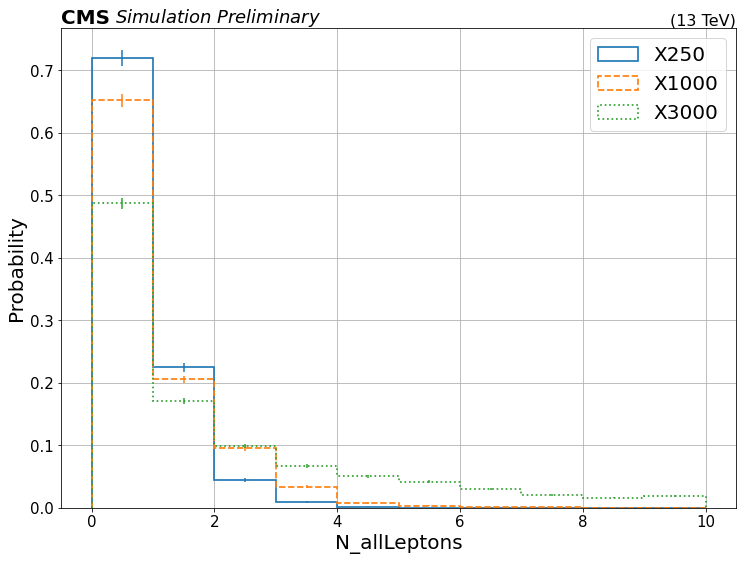

Variable: N_allJets
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0//output_X250_GluGluToRadionToHHTo2G2WTo2G4Q_0.root
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0//output_X1000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Private_Resonant_Production/2017/fullyhadronic_Spin_0//output_X3000_GluGluToRadionToHHTo2G2WTo2G4Q_0.root


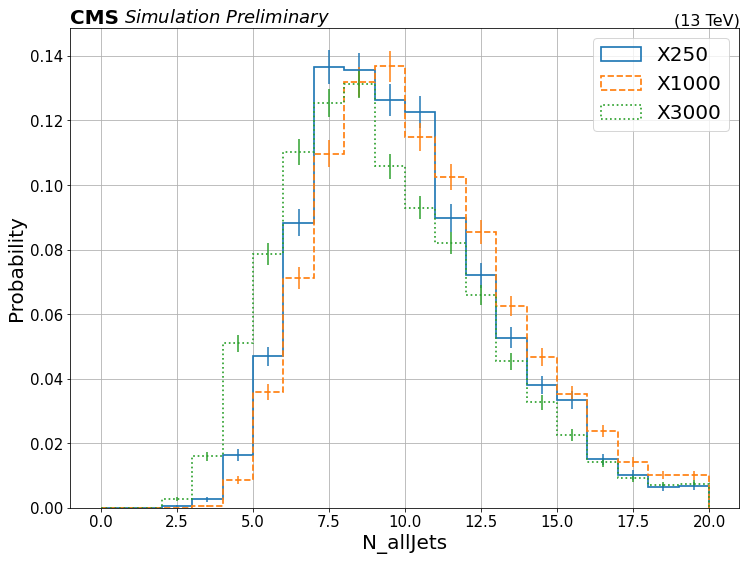

DONE


In [35]:
variables = [
#     "GEN_Leading_H_mass_over_pt",
#     "GEN_Subleading_H_mass_over_pt"    
#     "GEN_Leading_W_mass_over_pt",
#     "GEN_Subleading_W_mass_over_pt"
#     "GEN_DR_Lepton_Quark0",
#     "GEN_DR_Lepton_Quark1",
#     "GEN_Lepton_0_pdgId"
#     "GEN_Lepton_0_pt",
#     "GEN_Quark_0_pt",
#     "GEN_Quark_1_pt" ,  
#     "GEN_Lepton_0_eta", 
#     "GEN_Quark_0_eta", 
#     "GEN_Quark_1_eta", 
#     "GEN_Lepton_0_phi",
#     "GEN_Quark_0_phi", 
#     "GEN_Quark_1_phi",    
#     "N_allElectrons",
#     "N_allMuons",
    "N_allLeptons",
#     "N_goodLeptons",
    "N_allJets",
#     "N_goodJets",
#     "N_goodElectrons",
#     "N_goodMuons"
]

isWide = 0 

specialVariables = {
    "N_allLeptons" : ['add', 'N_allElectrons', "N_allMuons"],
    "N_goodLeptons" : ['add', 'N_goodElectrons', "N_goodMuons"],
    "GEN_DR_Lepton_Quark0" : ['dR', 'GEN_Lepton_0', 'GEN_Quark_0'],
    "GEN_DR_Lepton_Quark1" : ['dR', 'GEN_Lepton_0', 'GEN_Quark_1'],
    "GEN_Leading_W_mass_over_pt" : ['divide', 'Leading_GEN_W_M', "Leading_GEN_W_pt"],
    "GEN_Subleading_W_mass_over_pt" : ['divide', 'Subleading_GEN_W_M', "Subleading_GEN_W_pt"],
    "GEN_Leading_H_mass_over_pt" : ['divide', 'Leading_GEN_Higgs_M', "Leading_GEN_Higgs_pt"],
    "GEN_Subleading_H_mass_over_pt" : ['divide', 'Subleading_GEN_Higgs_M', "Subleading_GEN_Higgs_pt"],    
}

tags = [i for i in range(0,4)]

colors = ['C0', 'C1', 'C2']
lineStyles = ["solid", "dashed", "dotted"]

for v in variables:
    fig, ax = plt.subplots()
#     fig.set_dpi(200)
    fig.set_size_inches(10, 7.5)
    print("Variable:",v)
    xmin, xmax, nbins = BinDict[v]
    bins = np.linspace(xmin, xmax, nbins + 1)  
    
    ##-- Plot each file on the same artist 
#     for f_i, f in enumerate(SL_files):
    for f_i, f in enumerate(files):
        print("file:",f)
        color = colors[f_i]
        lineStyle = lineStyles[f_i]
        u_f = uproot.open(f)
        fEnd = f.split('/')[-1]
        fileLabel = fEnd.split('_')[1]
        tree_name = tree_names[fEnd]    
        vals = []
        weights = []        
    
        for tag_i in tags:
#             print("Tag:",tag_i)
            fullTreeName = "%s_HHWWggTag_%s"%(tree_name, tag_i)
            MC_weights = u_f['tagsDumper/trees'][fullTreeName]["weight"].array()

            ##-- Special vars which need adding, multiply, etc. of existing branches 
            if(v in specialVariables.keys()):
                operation, v1_name, v2_name = specialVariables[v]
                
                if(operation == 'dR'):
                    exec("eta_0 =    u_f['tagsDumper/trees'][fullTreeName]['%s_eta'].array()"%(v1_name))
                    exec("eta_1 =    u_f['tagsDumper/trees'][fullTreeName]['%s_eta'].array()"%(v2_name))
                    exec("phi_0 =    u_f['tagsDumper/trees'][fullTreeName]['%s_phi'].array()"%(v1_name))
                    exec("phi_1 =    u_f['tagsDumper/trees'][fullTreeName]['%s_phi'].array()"%(v2_name))
                    
                    variable_values = DeltaR(eta_0, eta_1, phi_0, phi_1)
                    
                else:
                    v1_values = u_f['tagsDumper/trees'][fullTreeName][v1_name].array()
                    v2_values = u_f['tagsDumper/trees'][fullTreeName][v2_name].array()
                    exec("variable_values = np.%s(v1_values, v2_values)"%(operation))
            else:
                variable_values = u_f['tagsDumper/trees'][fullTreeName][v].array()

            ##-- Update variable values with tag 
            vals = np.append(vals, np.array(variable_values))
            weights = np.append(weights, np.array(MC_weights))

        ##-- Make histogram 
        binVals, edges = np.histogram(vals, bins = bins, weights = weights) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
        binVals_noweights, edges_noweights = np.histogram(vals, bins = bins) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
        binWidth = (xmax - xmin) / nbins
        binCenters = [float(a) + (float(binWidth)/2.) for a in edges[:-1]]      
        
        ##-- Stat uncertainty - poissonian per bin then scale with normalization
        rel_yerrors = [0 if N == 0 else (np.sqrt(N) / N) for N in binVals_noweights] #-- delta(y)
        
        ##-- Normalize to unity so that each bin is a probability 
        hist_sum = np.sum(binVals)
        binVals = binVals / hist_sum

        normed_yerrors = np.multiply(binVals, rel_yerrors)
        
        plt.hist(bins[:-1], 
                 weights = binVals, 
                 bins = bins, 
                 histtype = 'step', 
                 label = fileLabel, 
                 linestyle=(lineStyle), 
                 linewidth=1.7,
                 color = color
                )
        plt.errorbar(x = binCenters, 
                     y = binVals, 
                     yerr = normed_yerrors, 
                     color = color, 
                     fmt = " ", # Removes the line 
#                      zorder = 2
                    ) 
    Add_CMS_Header(plt, isWide, ax)
    fig.tight_layout()
    plt.legend(fontsize = 20, loc = 'best')
    plt.xlabel(v, fontsize = 20)
    plt.ylabel("Probability", fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15) 
    plt.grid()
    if("DR" in v):
        ax.axvline(0.4, linestyle = 'solid', color = 'black') ##-- line at 0.4 because of 0.4 selection on dR for jets, leptons and photons. axvlines is by default from min to max 
        plt.text(
            0.12, 0.8, r"$\Delta$R $=$ 0.4",
            fontsize=25,
            horizontalalignment='left',
            verticalalignment='bottom',
            transform=ax.transAxes
        )   
    plt.show()
    plt.close()
    
print("DONE")